In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd

In [2]:
file_name = 'CH4 954 ppm raw/00'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(1,100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x           y0          y1        y2          y3
0            0  820507000.0 -14444500.0 -227840.0 -13735900.0
1            1  859676000.0  -6947580.0 -219392.0 -12532000.0
2            2  833578000.0    829952.0 -211968.0 -13924400.0
3            3  905413000.0   8641790.0 -206080.0 -16608000.0
4            4  806905000.0  15951100.0 -196608.0 -16278500.0
...        ...          ...         ...       ...         ...
9599995  95995  702471000.0 -23103000.0 -188928.0 -11244300.0
9599996  95996  786943000.0 -16965100.0 -192512.0 -13622000.0
9599997  95997  834429000.0  -9716480.0 -176128.0 -12947500.0
9599998  95998  827305000.0  -1933570.0 -163840.0 -12815100.0
9599999  95999  863073000.0   5976830.0 -177408.0 -15446000.0

[9600000 rows x 5 columns]


In [3]:
print(df_01.y0.iloc[:9_600_000].mean())
print(df_01.y0.iloc[:9_600_000].max())
print(df_01.y0.iloc[:9_600_000].min())

326396.836213125
1041970000.0
-1550060000.0


In [4]:
# Size_pyro = 9_600_000
Size_pyro = 9_600_000

sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

dt = 1.0/48_000

# wavelet = 'gaus1'
# max_scale = 5.65
# min_scale = 5.25

# wavelet = 'mexh'
# max_scale = 6.9
# min_scale = 6.5


# wavelet = 'gaus3'
# max_scale = 11.2
# min_scale = 10.5


# wavelet = 'gaus4'
# max_scale = 14.1
# min_scale = 13



# wavelet = 'cgau2'
# max_scale = 11.3
# min_scale = 10.3


# wavelet = 'cmor1-1792'
# max_scale = 48
# min_scale = 45.5

# wavelet = 'cmor10-1792'
# max_scale = 50
# min_scale = 45

wavelet = 'cmor1-1778'
# max_scale = 350
# min_scale = 320

max_scale = 400
min_scale = 300


# wavelet = 'morl'
# max_scale = 23
# min_scale = 21



scales = np.arange(min_scale, max_scale, 3)

slase = 95750
size_shape = 500

delta_time = 48000
interval = int(Size_pyro/delta_time)

In [5]:
[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)


period = 1.0/frequencies

print(frequencies)

# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))

[1960.         1940.59405941 1921.56862745 1902.91262136 1884.61538462
 1866.66666667 1849.05660377 1831.77570093 1814.81481481 1798.16513761
 1781.81818182 1765.76576577 1750.         1734.51327434 1719.29824561
 1704.34782609 1689.65517241 1675.21367521 1661.01694915 1647.05882353
 1633.33333333 1619.83471074 1606.55737705 1593.49593496 1580.64516129
 1568.         1555.55555556 1543.30708661 1531.25       1519.37984496
 1507.69230769 1496.18320611 1484.84848485 1473.68421053]


In [6]:
cfs_pyro = np.abs(cfs_pyro)
# cfs_pyro = np.real(cfs_pyro)

cfs_pyro_shape = np.array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])


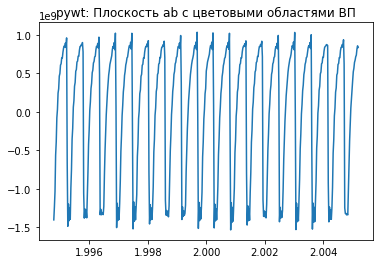

In [7]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, frequencies)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

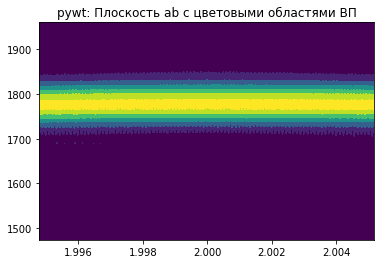

In [8]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape, extend='both')
plt.show()

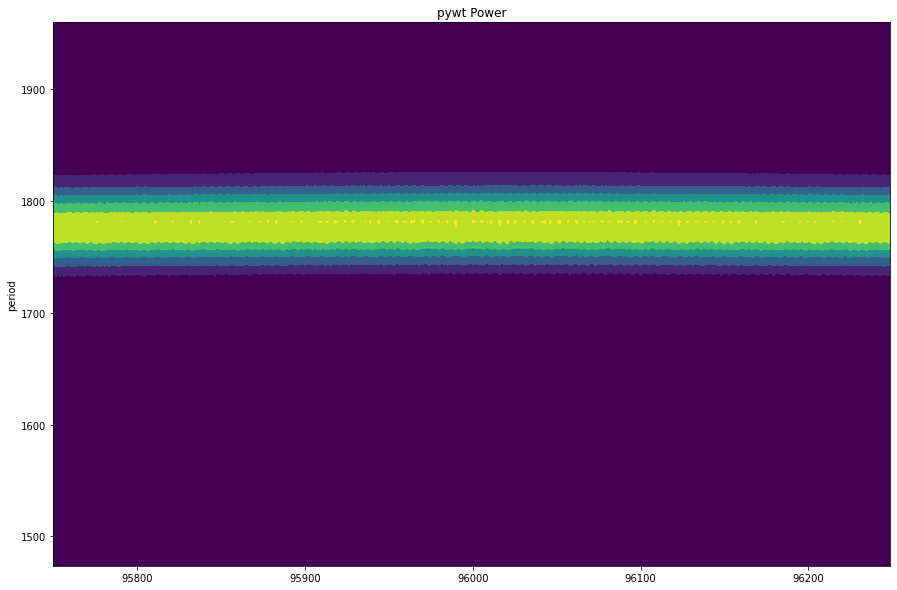

In [9]:
# power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (cfs_pyro_shape)**2

# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], frequencies, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

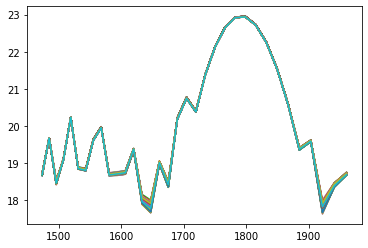

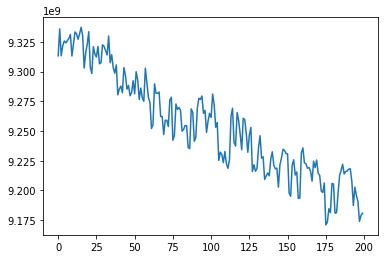

In [24]:
# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = cfs_pyro.transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = np.zeros((interval,int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = np.zeros((interval))
# Min_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[j][i-1] = temp_pyro[i-1].mean()
    plt.plot(frequencies, np.log(mean_pyro_scales[j]))
#     plt.plot(frequencies, mean_pyro_scales[j])
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     Min_pyro_amp_scales[j] = mean_pyro_scales[j].min()
#     print(frequencies[mean_pyro_scales[j].argmax()])
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()


# plt.figure('Max_pyro')
# plt.plot(Max_pyro_amp_scales - Min_pyro_amp_scales)
# plt.show()

In [25]:
from pathlib import Path  

df_mean_pyro_scales = pd.DataFrame(mean_pyro_scales)
df_mean_pyro_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_pyro_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_pyro_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)



                                              !!!KERNEL FALLED!!!

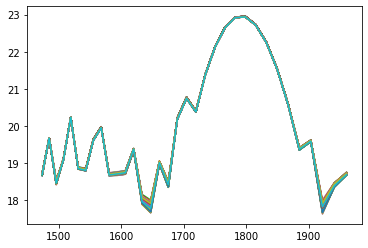

1798.1651376146792


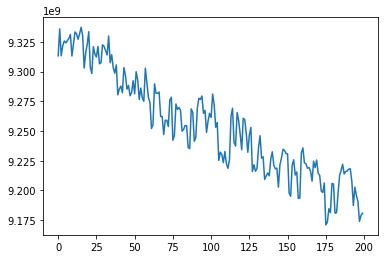

In [5]:
file_name_pyro = 'wt_raw/cmor1_1778_pyro_954.csv'
df_pyro_Amp = pd.read_csv(file_name_pyro) 
df_pyro_Amp = df_pyro_Amp.drop('Unnamed: 0', axis = 1)


mean_pyro_scales = df_pyro_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_pyro_Amp.columns)])

frequencies = 1.0/period

plt.figure('max_Amp')
    
Max_pyro_amp_scales = np.zeros((interval))
# Min_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     Min_pyro_amp_scales[j] = mean_pyro_scales[j].mean()
#     print(1.0/period[mean_pyro_scales[j].argmax()])
plt.show()

print(1.0/period[mean_pyro_scales[1].argmax()])
# print(1.0/period[mean_pyro_scales[1].argmin()])

# print(1.0/period[mean_pyro_scales[5].argmax()])
# print(1.0/period[mean_pyro_scales[5].argmin()])


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()    

# plt.figure('Max_pyro')
# plt.plot(Max_pyro_amp_scales - Min_pyro_amp_scales)
# plt.show()    

In [6]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

period = 1.0/frequencies


KeyboardInterrupt: 

In [16]:
cfs_oad = np.abs(cfs_oad)

cfs_oad_shape = np.array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])

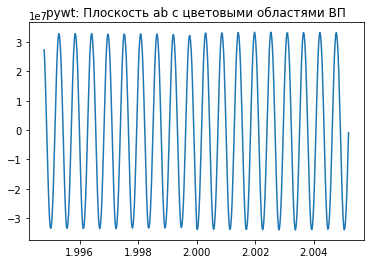

In [17]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

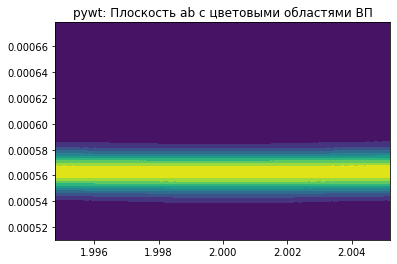

In [18]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

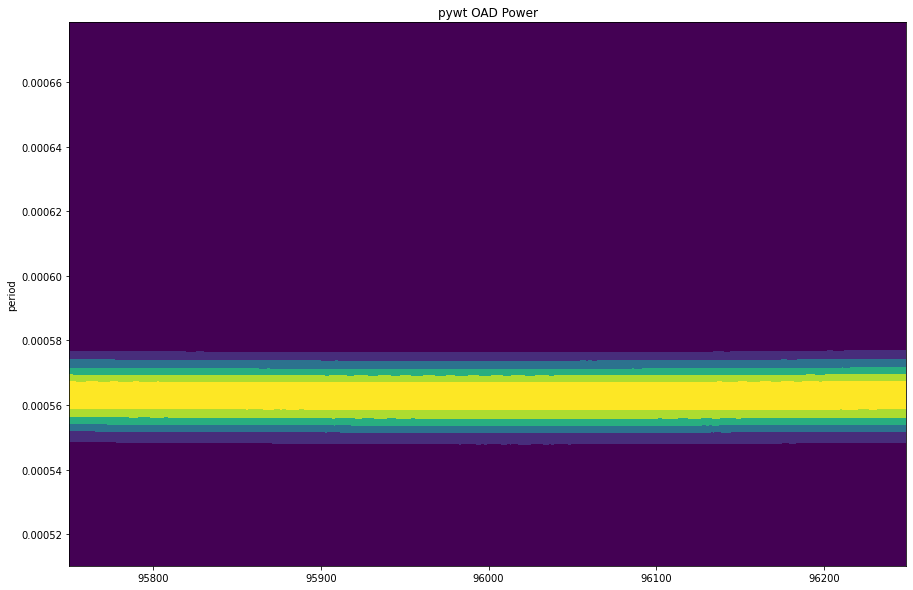

In [19]:
power_oad_shape = (cfs_oad_shape)**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

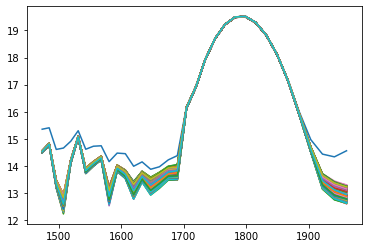

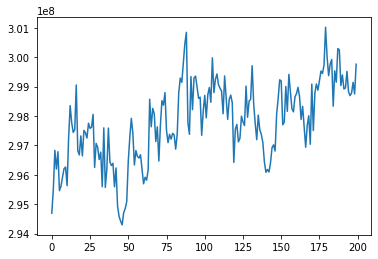

In [27]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = cfs_oad.transpose()
# Amp_oad = zeros((interval))


mean_oad_scales = np.zeros((interval,int(len(scales))))

Max_oad_amp_scales = np.zeros((interval))
# Min_oad_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[j][i-1] = temp_oad[i-1].mean()
    plt.plot(frequencies, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     Min_oad_amp_scales[j] = mean_oad_scales[j].min()

#     print(frequencies[mean_oad_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.abs(Max_oad_amp_scales))
# plt.plot(np.log(Max_oad_amp_scales - Min_oad_amp_scales))
plt.show()

In [28]:
from pathlib import Path  

df_mean_oad_scales = pd.DataFrame(mean_oad_scales)
df_mean_oad_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_oad_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

                                            !!! KERNEL FALLED !!!

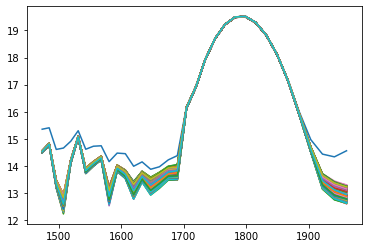

1798.1651376146792


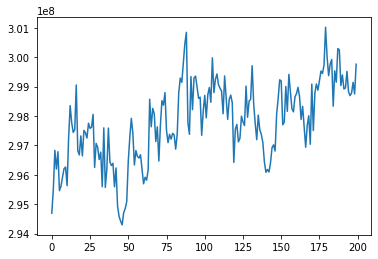

In [7]:
file_name_oad = 'wt_raw/cmor1_1778_oad_954.csv'
df_oad_Amp = pd.read_csv(file_name_oad) 
df_oad_Amp = df_oad_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_scales = df_oad_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_oad_Amp.columns)])

plt.figure('max_Amp')
    
Max_oad_amp_scales = np.zeros((interval))
# Min_oad_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     Min_oad_amp_scales[j] = mean_oad_scales[j].mean()

    #     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_oad_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
# plt.plot(Max_oad_amp_scales - Min_oad_amp_scales)
plt.show()    



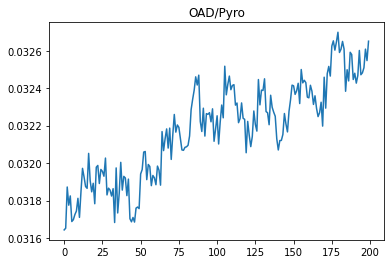

In [8]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
# S_wavelet = np.sqrt(Max_oad_amp_scales**2 - Min_oad_amp_scales**2)/np.sqrt(Max_pyro_amp_scales**2 - Min_pyro_amp_scales**2)
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_wavelet)
plt.show()

In [9]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1700
max_freq = 1850

max_intensity_OAD = np.zeros(200)
max_index_OAD = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

for i in range(100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE]
    OAD = df.y1.values[0:SAMPLE_RATE]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*i] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*i+1] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i+1] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])

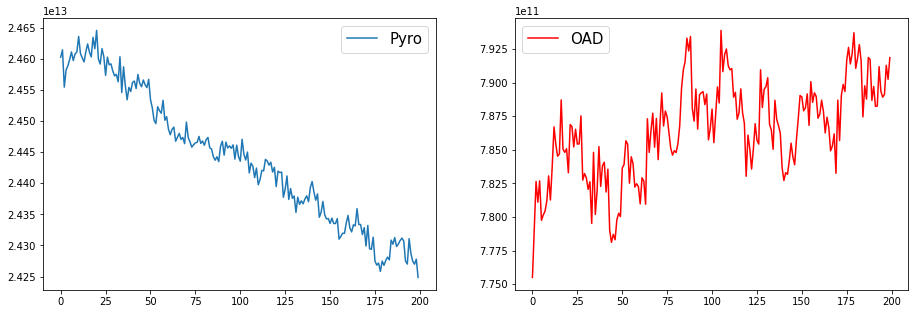

In [10]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})



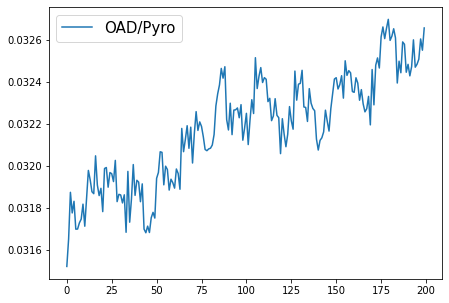

In [11]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

# print(S_fourier.std()/S_fourier.mean())


# from scipy.optimize import curve_fit

# def func_theory(x, A, B):
#     return A + B*x


# x = np.arange(200)

# popt, pcov = curve_fit(func_theory, x, S_fourier)

# A_opt,B_opt = popt

# print(B_opt/S_fourier.mean()*100)


# d_S_f = S_fourier - func_theory(x,A_opt,B_opt)
# print(d_S_f.std()/S_fourier.mean()*100)




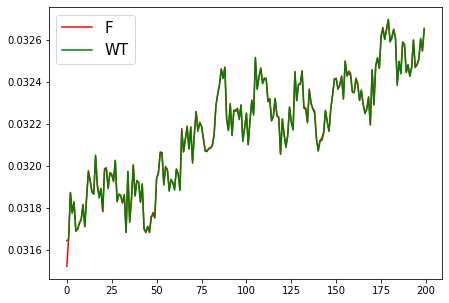

In [12]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.legend(prop={'size': 15})

In [13]:
print(S_fourier.std()-S_wavelet.std())
print(S_fourier.std()/S_fourier.mean(), S_wavelet.std()/S_wavelet.mean())
print((S_fourier - S_wavelet).mean())
print((S_fourier - S_wavelet).mean()/S_fourier.mean()*100)

1.3894227564259726e-06
0.008127999736340074 0.008085139407438168
1.27281047111346e-06
0.003955609697042785


           x            y0          y1      y2          y3
0          0  5.274840e+08 -32779000.0 -171264   3549180.0
1          1  5.807320e+08 -33825000.0 -168960   2942720.0
2          2  6.446870e+08 -33116200.0 -170752  -1469440.0
3          3  6.795840e+08 -30837800.0 -154368  -8977410.0
4          4  7.147930e+08 -27103200.0 -172032 -10121500.0
...      ...           ...         ...     ...         ...
95995  95995 -1.380270e+09  33084200.0 -185856   1310720.0
95996  95996 -1.274260e+09  31452200.0 -173568   6033410.0
95997  95997 -1.363920e+09  28560400.0 -172288  10329300.0
95998  95998 -1.293970e+09  24231900.0 -174336   8512260.0
95999  95999 -1.089390e+09  18398200.0 -167680  16976400.0

[96000 rows x 5 columns]


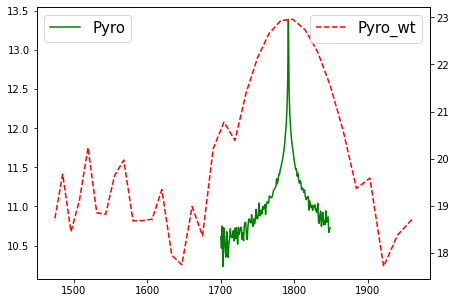

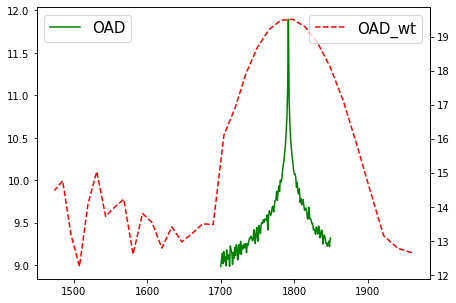

In [14]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df1)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df1.y1.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')





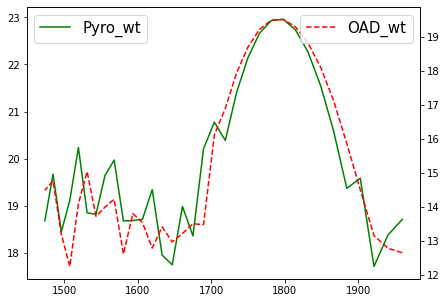

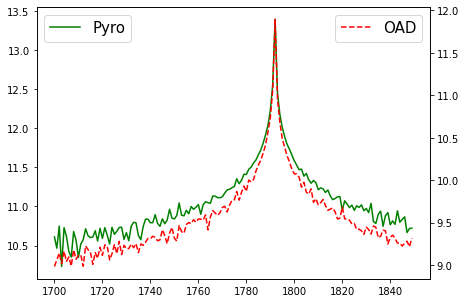

In [15]:
fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='green', label = 'Pyro_wt')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')




fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='red', linestyle='--', label = 'OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

                                                NOISE OAD

In [28]:
print(df_01.y1.iloc[:Size_pyro].mean())
print(df_01.y1.iloc[:Size_pyro].std())

noise_oad = np.random.normal(0, 100 * df_01.y1.iloc[:9_600_000].std(), size = Size_pyro)
df_01['oad_noise'] = df_01.y1 + noise_oad



-362936.39139625
23816573.175047703


In [38]:
sst_oad_noise  = df_01.oad_noise.iloc[:Size_pyro]

[cfs_oad_noise, frequencies] = pywt.cwt(sst_oad_noise, scales, wavelet, dt)

period = 1.0/frequencies

In [39]:
cfs_oad_noise = np.abs(cfs_oad_noise)
cfs_oad_shape_noise = np.array([cfs_oad_noise[i-1][slase:slase+size_shape] for i in range(len(scales))])

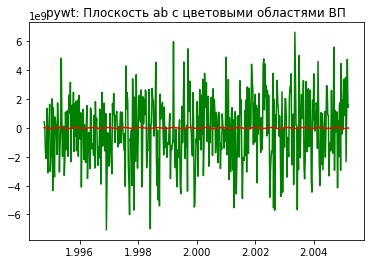

In [40]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
sst_oad = df_01.y1.iloc[:Size_pyro]

plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_oad_noise[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape], color = 'red')
plt.show()

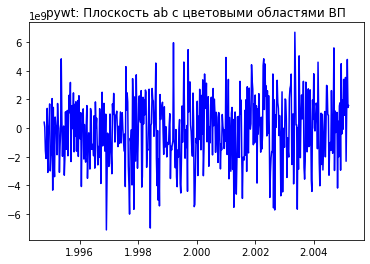

In [41]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_oad_noise[slase:slase+size_shape] - sst_oad[slase:slase+size_shape],
         color = 'blue')

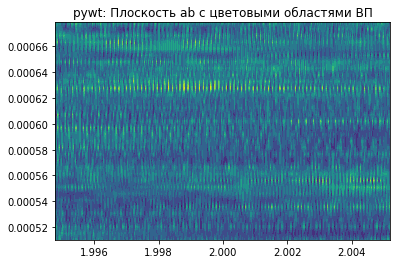

In [42]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape_noise, 10)
plt.show()

# plt.figure('pywt: 2D-график для z = w (a,b)')
# plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# # plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
# plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
# plt.show()


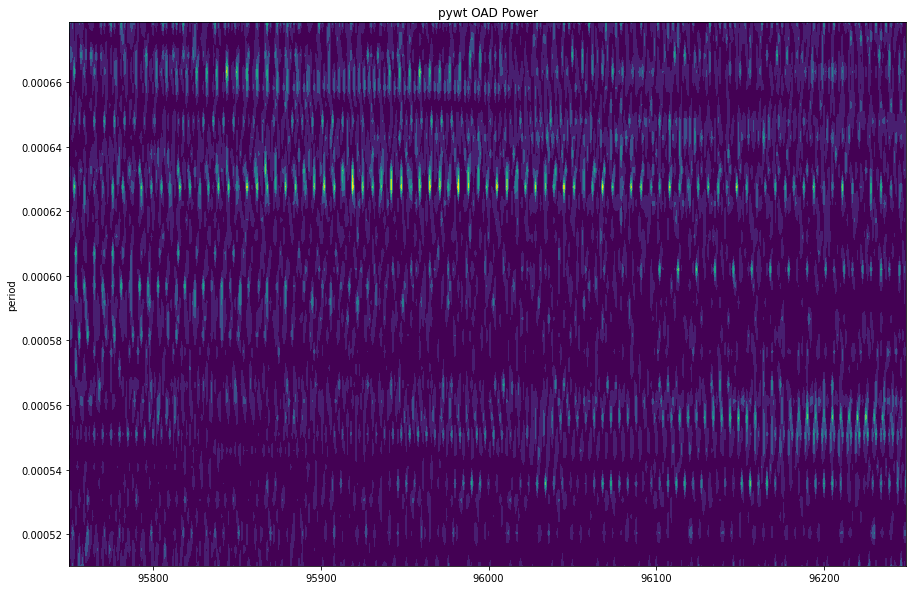

In [43]:
power_oad_shape_noise = (cfs_oad_shape_noise)**2

period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]

f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape_noise, extend='both')
ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()


# f, ax = plt.subplots(figsize=(15, 10))
# ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')
# ax.set_title("pywt OAD Power")
# ax.set_ylabel('period')
# plt.show()

1507.692307692308
1519.3798449612407
1473.684210526316
1507.692307692308
1496.1832061068706
1496.1832061068706
1633.3333333333335
1496.1832061068706
1473.684210526316
1484.8484848484852
1507.692307692308
1473.684210526316
1473.684210526316
1496.1832061068706
1484.8484848484852
1593.49593495935
1473.684210526316
1484.8484848484852
1507.692307692308
1473.684210526316
1496.1832061068706
1484.8484848484852
1473.684210526316
1580.645161290323
1473.684210526316
1484.8484848484852
1606.5573770491806
1519.3798449612407
1531.2500000000002
1484.8484848484852
1568.0000000000002
1531.2500000000002
1484.8484848484852
1473.684210526316
1473.684210526316
1580.645161290323
1531.2500000000002
1484.8484848484852
1519.3798449612407
1496.1832061068706
1484.8484848484852
1484.8484848484852
1473.684210526316
1484.8484848484852
1496.1832061068706
1543.3070866141734
1496.1832061068706
1484.8484848484852
1484.8484848484852
1473.684210526316
1484.8484848484852
1507.692307692308
1519.3798449612407
1555.555555555

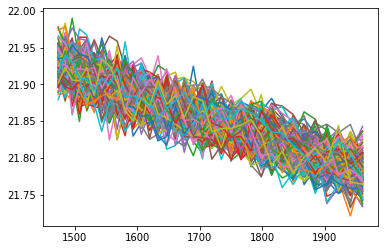

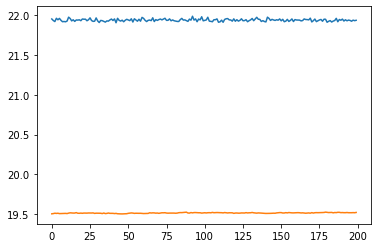

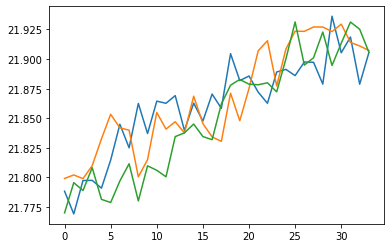

In [45]:
# power_oad_tr = power_oad.transpose()
power_oad_noise_tr = cfs_oad_noise.transpose()
# Amp_oad = zeros((interval))


mean_oad_noise_scales = np.zeros((interval,int(len(scales))))

Max_oad_noise_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad_noise = power_oad_noise_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_noise_scales[j][i-1] = temp_oad_noise[i-1].mean()
    plt.plot(frequencies, np.log(mean_oad_noise_scales[j]))
    Max_oad_noise_amp_scales[j] = mean_oad_noise_scales[j].max()
    print(frequencies[mean_oad_noise_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_oad_noise_amp_scales))
plt.plot(np.log(Max_oad_amp_scales))

plt.show()

plt.figure('Max_oad')
plt.plot(np.log(mean_oad_noise_scales[1]))
plt.plot(np.log(mean_oad_noise_scales[10]))
plt.plot(np.log(mean_oad_noise_scales[30]))
plt.show()


In [46]:
from pathlib import Path  

df_mean_oad_noise_scales = pd.DataFrame(mean_oad_noise_scales)
df_mean_oad_noise_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_oad_noise_0_01_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_noise_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

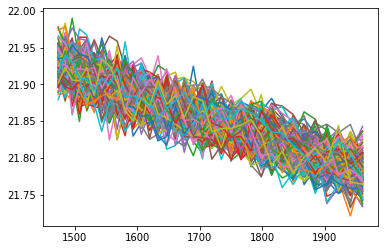

1519.3798449612407


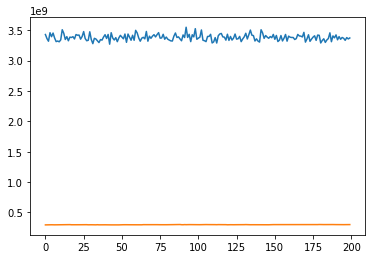

In [47]:
file_name_oad_noise = 'wt_raw/cmor1_1778_oad_noise_0_01_954.csv'
df_oad_noise_Amp = pd.read_csv(file_name_oad_noise) 
df_oad_noise_Amp = df_oad_noise_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_noise_scales = df_oad_noise_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_oad_noise_Amp.columns)])

plt.figure('max_Amp')
    
Max_oad_noise_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_oad_noise_scales[j]))
    Max_oad_noise_amp_scales[j] = mean_oad_noise_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_oad_noise_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_oad_noise_amp_scales)
plt.plot(Max_oad_amp_scales)
plt.show()    

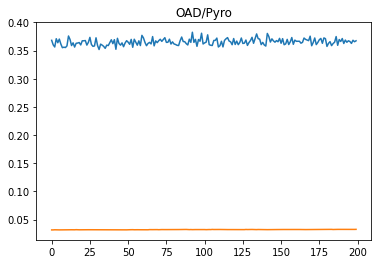

In [48]:
S_noise_wavelet = Max_oad_noise_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_noise_wavelet)
plt.plot(S_wavelet)
plt.show()

1723.0
1762.0
1705.0
1767.0
1803.0
1733.0
1833.0
1707.0
1724.0
1792.0
1780.0
1726.0
1717.0
1709.0
1845.0
1844.0
1772.0
1804.0
1789.0
1719.0
1792.0
1711.0
1839.0
1849.0
1715.0
1777.0
1717.0
1829.0
1848.0
1828.0
1747.0
1819.0
1724.0
1792.0
1826.0
1820.0
1815.0
1701.0
1817.0
1826.0
1718.0
1792.0
1741.0
1749.0
1736.0
1755.0
1838.0
1733.0
1755.0
1774.0
1792.0
1747.0
1792.0
1758.0
1700.0
1711.0
1741.0
1792.0
1792.0
1716.0
1792.0
1792.0
1821.0
1821.0
1761.0
1792.0
1754.0
1804.0
1728.0
1781.0
1846.0
1792.0
1805.0
1845.0
1710.0
1798.0
1838.0
1792.0
1810.0
1735.0
1822.0
1843.0
1711.0
1750.0
1701.0
1792.0
1792.0
1792.0
1837.0
1792.0
1785.0
1800.0
1768.0
1741.0
1818.0
1703.0
1770.0
1792.0
1747.0
1796.0


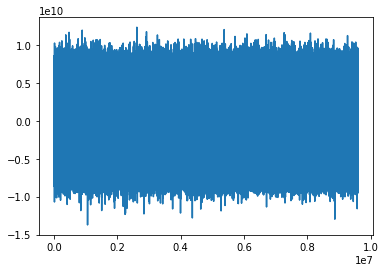

In [50]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1700
max_freq = 1850

max_intensity_OAD_noise = np.zeros(200)
max_index_OAD_noise = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

plt.plot(df_01.oad_noise)

for i in range(100):
    Pyro = df_01.y0.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)

    max_intensity_OAD_noise[2*i] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df_01.y0.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)
    max_intensity_OAD_noise[2*i+1] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i+1] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
    print(xf[min_freq + np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))])

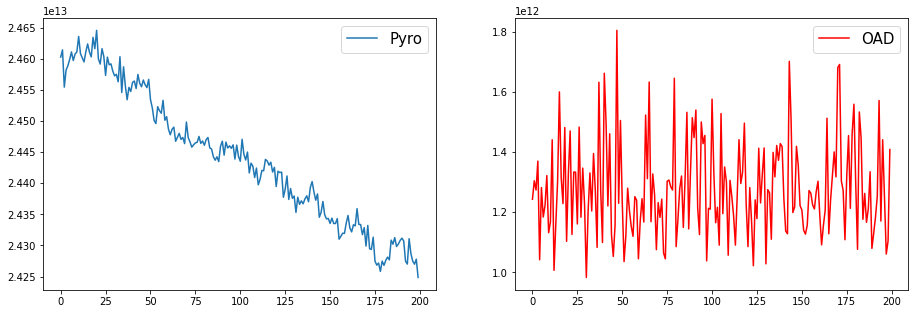

In [51]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD_noise, 'red', label='OAD')
ax2.legend(prop={'size': 15})



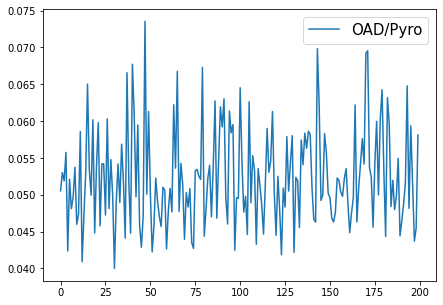

In [52]:
S_fourier_noise = max_intensity_OAD_noise/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

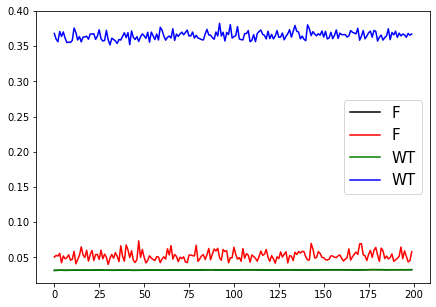

In [53]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'black')
ax1.plot([i for i in range(200)],S_fourier_noise, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.plot([i for i in range(200)],S_noise_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

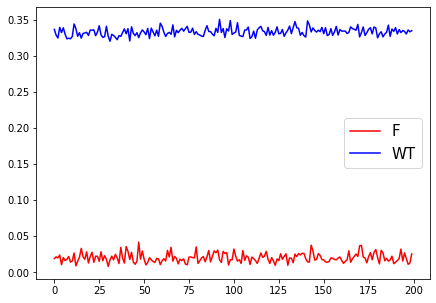

In [54]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise - S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_noise_wavelet - S_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

In [55]:
print((S_fourier_noise - S_fourier).mean())
print((S_fourier_noise - S_fourier).std())
print((S_noise_wavelet - S_wavelet).mean())
print((S_noise_wavelet - S_wavelet).std())

0.020150194713157835
0.006452438990272894
0.33311676115791855
0.005630927799468614


               x           y0          y1        y2          y3     oad_noise
0              0  820507000.0 -14444500.0 -227840.0 -13735900.0 -4.509161e+08
1              1  859676000.0  -6947580.0 -219392.0 -12532000.0 -5.324421e+09
2              2  833578000.0    829952.0 -211968.0 -13924400.0 -2.928268e+08
3              3  905413000.0   8641790.0 -206080.0 -16608000.0 -3.724662e+09
4              4  806905000.0  15951100.0 -196608.0 -16278500.0 -1.137909e+09
...          ...          ...         ...       ...         ...           ...
9599995  9599995  702471000.0 -23103000.0 -188928.0 -11244300.0 -6.929000e+08
9599996  9599996  786943000.0 -16965100.0 -192512.0 -13622000.0 -3.504458e+09
9599997  9599997  834429000.0  -9716480.0 -176128.0 -12947500.0  4.286996e+09
9599998  9599998  827305000.0  -1933570.0 -163840.0 -12815100.0  3.887332e+09
9599999  9599999  863073000.0   5976830.0 -177408.0 -15446000.0  4.705141e+08

[9600000 rows x 6 columns]


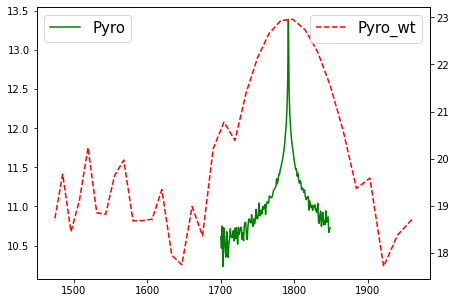

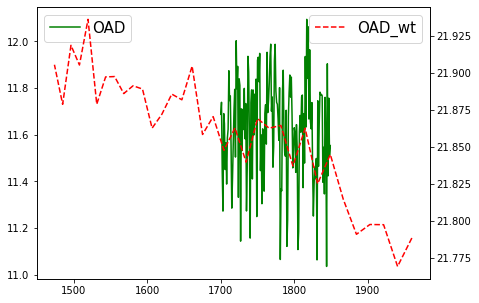

In [56]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df_01)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df_01.oad_noise.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_noise_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



               x           y0          y1        y2          y3     oad_noise
0              0  820507000.0 -14444500.0 -227840.0 -13735900.0 -4.509161e+08
1              1  859676000.0  -6947580.0 -219392.0 -12532000.0 -5.324421e+09
2              2  833578000.0    829952.0 -211968.0 -13924400.0 -2.928268e+08
3              3  905413000.0   8641790.0 -206080.0 -16608000.0 -3.724662e+09
4              4  806905000.0  15951100.0 -196608.0 -16278500.0 -1.137909e+09
...          ...          ...         ...       ...         ...           ...
9599995  9599995  702471000.0 -23103000.0 -188928.0 -11244300.0 -6.929000e+08
9599996  9599996  786943000.0 -16965100.0 -192512.0 -13622000.0 -3.504458e+09
9599997  9599997  834429000.0  -9716480.0 -176128.0 -12947500.0  4.286996e+09
9599998  9599998  827305000.0  -1933570.0 -163840.0 -12815100.0  3.887332e+09
9599999  9599999  863073000.0   5976830.0 -177408.0 -15446000.0  4.705141e+08

[9600000 rows x 6 columns]


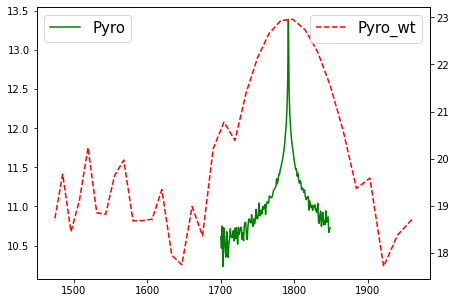

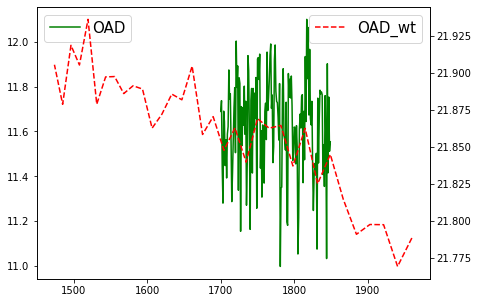

In [57]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df_01)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df_01.oad_noise.values[:SAMPLE_RATE] - df_01.y1.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_noise_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


